In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.pop('Id')
df.columns = df.columns.str.lower()
X = df.iloc[:,:4]
y = df['species']

In [7]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [10]:
param_dist = [{"max_depth": [3, None],
              "max_features": [1,2,3,4,5,6,7,8,9,0],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9,0],
              "criterion": ["gini", "entropy"]}]


In [11]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()

In [ ]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X,y)

In [13]:
print("Decision Tree RandomSearch: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Decision Tree RandomSearch: {'min_samples_leaf': 1, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy'}
Best score is 0.9533333333333334


In [14]:
tree_grid = GridSearchCV(tree, param_grid=param_dist, cv=5)

In [ ]:
clf = tree_grid.fit(X,y)

In [29]:
print(" Decision Tree GridSearch: {}".format(tree_grid.best_params_))
print("Best score is {}".format(tree_grid.best_score_))

 Decision Tree GridSearch: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.9733333333333334


In [30]:
#SINCE DRID SEARCH IS BETTER WE WILL USE GRIDSEARCHCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
tree_grid.score(X_train, y_train)

0.9666666666666667

In [32]:
tree_grid.predict(X_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [33]:
accuracy = tree_grid.score(X_test, y_test)
print(accuracy)

1.0


[Text(348.75, 792.75, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(232.5, 566.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(465.0, 566.25, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(232.5, 339.75, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(116.25, 113.25, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(348.75, 113.25, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(697.5, 339.75, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(581.25, 113.25, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(813.75, 113.25, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

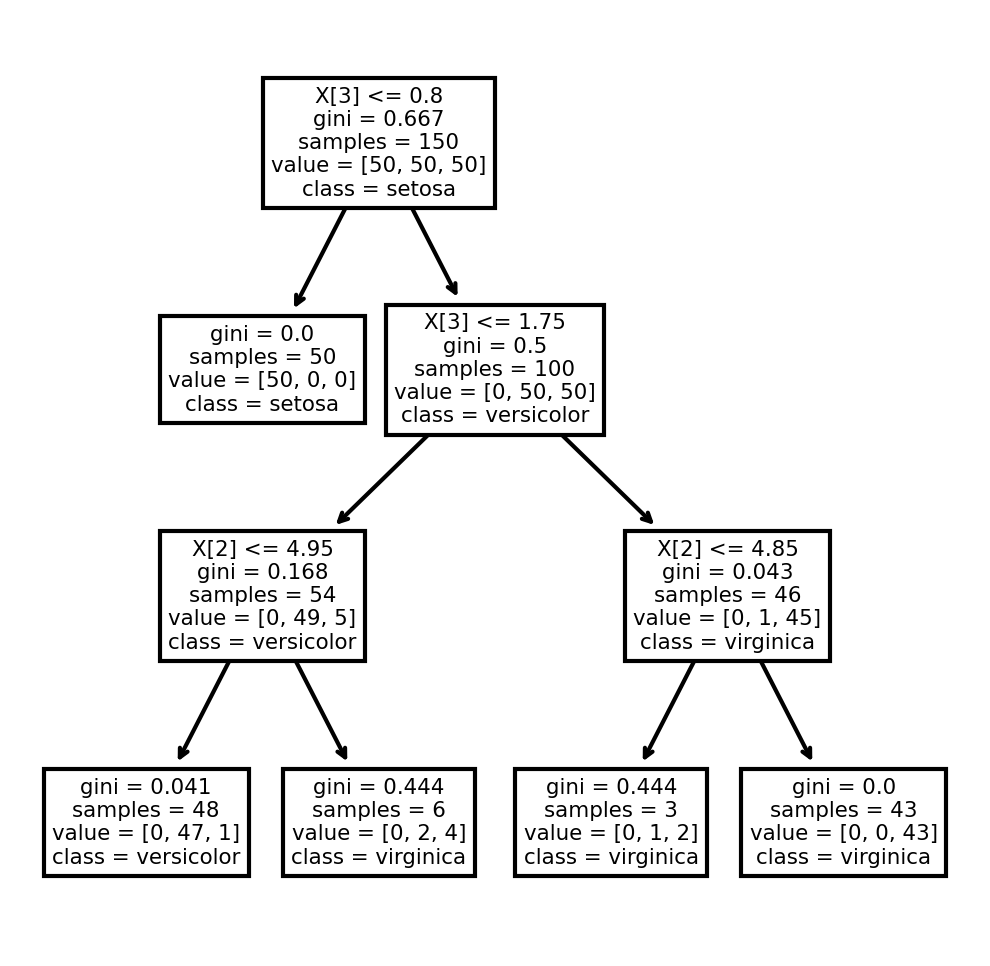

In [40]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf.best_estimator_,class_names=['setosa','versicolor','virginica'])